### Assumptions of Linear Regression

1)Linear Relationship between input and output
<br>2)No multicollinearity
<br>3)Homoscedasticity
<br>4)Normality of Residual
<br>5)No Autocorrection of error

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/data.csv')

In [ ]:
df

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
...,...,...,...,...
195,0.255081,-0.231497,-0.239632,38.067836
196,0.276068,-0.648411,-0.077441,12.812755
197,0.122250,-1.157383,0.765721,70.454115
198,-0.914822,-0.897140,-0.784205,-93.235783


In [ ]:
df.isna().any()

feature1    False
feature2    False
feature3    False
target      False
dtype: bool

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model=LinearRegression()

In [ ]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([ -34.95697328,  190.76564467,   14.52620588,  -16.25455917,
        119.77879489, -107.89997389,  -40.03311747,   94.07359194,
         -7.34200841,   28.88406592,   16.23351387, -107.92888731,
         65.58587484,  143.55760884,  -21.01342226,  138.92927551,
        -51.27278363,  170.23607445,   60.65242914,  179.70615218,
         33.75028023,   21.01706893,   69.17917212,  -12.63329849,
         -2.51627601, -107.00980181,  180.46665883, -121.22363728,
        -31.10541493,  135.35783106,  108.31797595,   -9.97981809,
          7.25020325,   53.99299796,   28.8475299 ,  -46.98709147,
         13.00875352,  104.75696038,  -51.19328341,   81.02289122,
        172.90249257,  -22.76741854, -124.96642059,  -64.73814384,
       -106.12030309,  -98.53826716,  -51.19299468,  109.77092182,
       -156.60250096,  162.19981949,  -57.26050197,  -59.10995959,
         25.58410496,   25.07589436,   87.84310696,   14.42974909,
        -16.1424951 ,   54.8579839 ,  -39.6161593 ,  141.52988

In [ ]:
residual=y_test-y_pred
residual

array([ 32.49620797,   0.37475489, -31.81205589,  21.96416251,
       -21.08545624,  14.66419043, -13.23428868,  -7.4099452 ,
        39.19328796, -29.69896732,   3.780353  , -19.1038142 ,
        -4.08879719, -10.71416044, -21.21860153,  10.4231588 ,
         9.17275364, -20.03437866,  -4.78444954,  35.34060362,
        19.03953769,  12.35852811, -25.94757359, -46.36134358,
         4.00595995, -10.77941883,   9.66733444,   6.603662  ,
       -13.16816703,   7.72119236, -15.41063857,  15.32289894,
         8.14477442,  19.33274409, -21.42585475,  14.79880935,
        -2.95206971,  22.50182803, -18.59658516,   4.0394567 ,
        21.3126649 , -36.90252138, -27.66680424, -40.87126522,
        11.01422884,   1.21582399, -13.50498152,  17.01905658,
       -22.17532178,  11.21232406,  -3.15584348,   8.45058108,
        19.49412952,   6.8077786 ,  -0.71628874,  33.54326128,
       -23.70370843,  20.66550451,  -3.15596956,   9.50471573,
       -21.97769805, -26.56335363, -18.5572426 ,  16.30

##Linear Realtionship between input and output

Text(0.5, 1.0, 'Feature3')

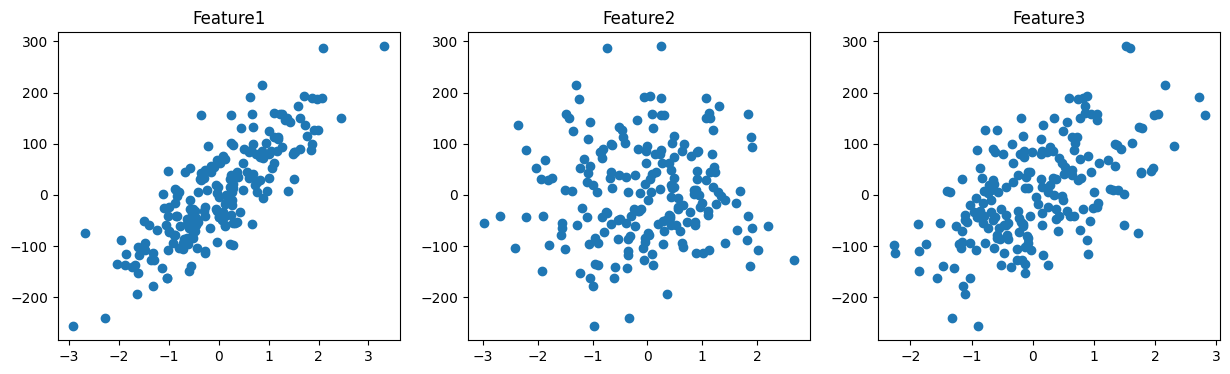

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(15,4))

ax1.scatter(df['feature1'],df['target'])
ax1.set_title("Feature1")

ax2.scatter(df['feature2'],df['target'])
ax2.set_title("Feature2")

ax3.scatter(df['feature3'],df['target'])
ax3.set_title("Feature3")

#Check Multicollinearity

It can be done by finding the variance_inflation_factor if it is around 1 there is no multicollinearity else if it is above 5 it is there.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]

for i in range(X_train.shape[1]):
  vif.append(variance_inflation_factor(X_train,i))

In [ ]:
vif

[1.010464145368371, 1.0090776100621908, 1.0154788099512182]

As we can see all the features have variance_inflation_factor near 1 all these three are indepandent of each other.

In [ ]:
pd.DataFrame({'vif':vif},index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010464,1.009078,1.015479


Another technique is to see the correlation between features

<Axes: >

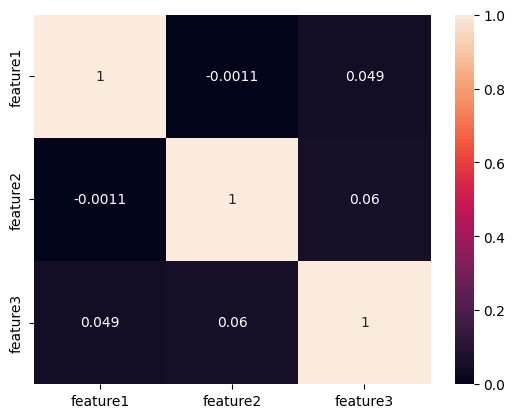

In [ ]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

##Normality of Residual

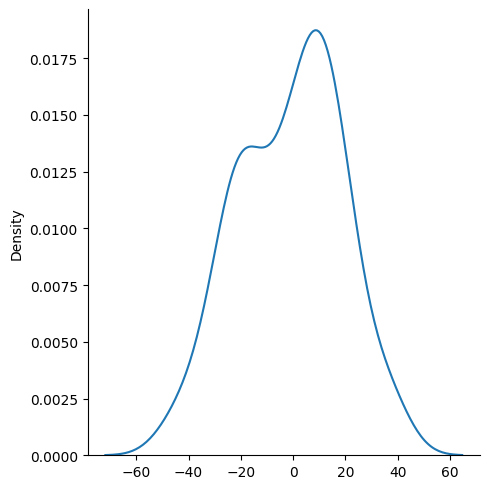

In [ ]:
sns.displot(residual,kind='kde')

[]

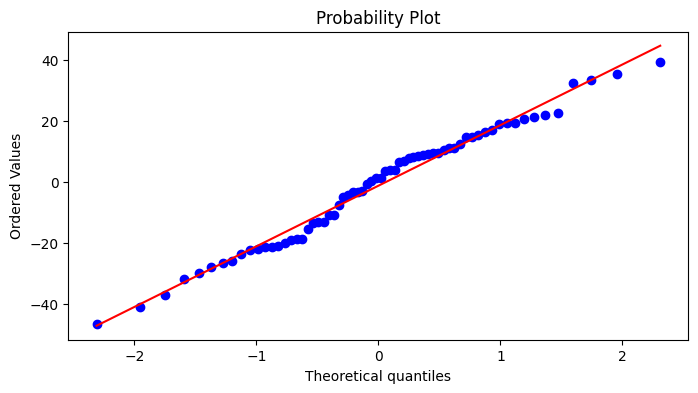

In [ ]:
#QQ plot

import scipy as sp

fig,ax=plt.subplots(figsize=(8,4))
sp.stats.probplot(residual,plot=ax,fit=True)

plt.plot()

#Homoscedasticity
It means the spread of residual should be uniform so inorder to check this we will plot graph between predicted values and residual(y_test-y_pred)

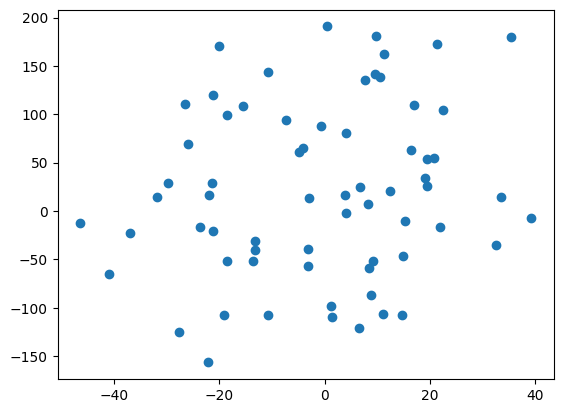

In [ ]:
plt.scatter(residual,y_pred)

#No autocorrelation between error

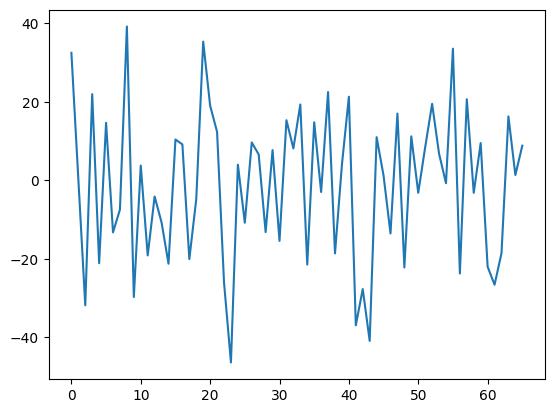

In [ ]:
plt.plot(residual)